Last time, we briefly learned about linear regression.

Now let's move on to multi-linear regression.

The difference between multi-linear regression and general linear regression is that the output value, y, is affected by multiple input values.

That is, in simple linear regression, if the hypothesis (prediction) function is:  
h(x) = theta_0 + theta_1*x_1 
where x_1 is only input value

The hypothesis (prediction) function in multiple linear regression is as follows.  
h(x) = theta_0 + theta_1 * x_1 + theta_2 * x_2 .....theat_n * x_n
where x_1, x_2...x_n are multiple input values
Here, the number of input variables is called feature.  
Then, what is the same and different between multiple linear regression and simple linear regression?  

Once the cost function does not change.  

![title](https://raw.githubusercontent.com/satishgunjal/Images/master/Cost_Function_Formula.png)

In the Gradient Descent Algorithm, some changes occur  
${\mathbf {\theta}}$  There are only increase of variables, but there is no change in the fundamental formula.

${\mathbf {\theta}}$ = The number of features +1 and +1 exist because of the intercept.


Now let's implement it through code.

In [193]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from CHAE_ML import train_test_split
red_wine = pd.read_csv('./winequality-red.csv', sep=';')
white_wine = pd.read_csv('./winequality-white.csv',sep=';')
df = pd.concat([red_wine, white_wine])
df.reset_index(drop=True, inplace=True)
df.info()
df.head() # To get first n rows from the dataset default value of n is 5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [194]:
# df = df.to_numpy()
# np.random.shuffle(df)
# y=df[:,-1]
# x=df[:,:11]
y = df['quality'] # 레이블(종속변수)
X = df.drop(['quality'], axis=1, inplace=False) # 피처(독립변수)
def train_test_split(data ,target ,test_size):
#data.reset_index(drop=True, inplace=True) #데이터를 일단 섞어주기
    # random.shuffle(data)
    # random.shuffle(target)
    data.reset_index(drop=True, inplace=True) #데이터를 일단 섞어주기
    x_train = data.iloc[:round(len(data)*(1-test_size)),:]#0~0.7
    y_train = target.iloc[:round(len(target)*(1-test_size)),]
    x_test = data.iloc[round(len(data)*(1-test_size)):,:]#0.7~1
    y_test = target.iloc[round(len(target)*(1-test_size)):,]#0.7~1
    x_train = x_train.to_numpy()
    y_train = y_train.to_numpy()
    x_test = x_test.to_numpy()
    y_test = y_test.to_numpy()
    print("x_train: {} , x_test: {} ,y_train: {},y_test: {} ".format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))

    return x_train , x_test , y_train , y_test 
x_train , x_test , y_train , y_test  = train_test_split(X,y,0.3)
# X, y = np.arange(10).reshape((5, 2)), range(5)

# X= X.to_numpy()
# X1 = X
#X = df.values[:, 0:11]  # get input values from first two columns
#y = df.values[:, 0]  # get output values from last coulmn
m = len(y_train) # Number of training examples
m2= len(y_test)
print('Total no of training examples (m) = %s \n' %(m))
print(x_train[0:1,:])
# Show only first 5 records
# for i in range(5):
#     print('x =', X[i], ', y =', y[i])


x_train: (4548, 11) , x_test: (1949, 11) ,y_train: (4548,),y_test: (1949,) 
Total no of training examples (m) = 4548 

[[ 7.4     0.7     0.      1.9     0.076  11.     34.      0.9978  3.51
   0.56    9.4   ]]


Function normalization
You can see that each variable in wine has a fairly large deviation,  
some of which are less than 0.1, while the alcohol content is up to 15. This negatively affects the performance of gradient descent algorithms.  
In the gradient descent algorithm, we calculate the cost for all steps.  
And if the input values are different in order of magnitude, the results after all the gradient descent steps will also vary significantly.  
You can prevent this by changing the range of input variables.  
Use the technique below to change the range of input variables.  

Normalization  

Feature Scaling : Feature scaling divides the input value by the range of input variables (maximum - minimum).  
 x1 = x1 / s1
  where,
  x1 = input variable
  s1 = range
 
  x1 = (x1 - mu1)/s1
  where,
  x1 = input variable
  mu1 = average value
  s1 = range or standard deviation

이제 적용을 하기전에 약간의 문제가 생기는데 변수를 그대로 적용하면 함수가 박살납니다.
x1이 0~1범위인데 x2가 0~1000범위를 갖게되면 그래프가 아주 이상하게 나오거든요.
그래서 일단 모든 변수의 범위를 0~1로 지정해줄 변수 정규화(feature normalize)를 먼저 진행할겁니다.

In [195]:
def feature_normalize(X):
  """
    Normalizes the features(input variables) in X.

    Parameters
    ----------
    X : n dimensional array (matrix), shape (n_samples, n_features)
        Features(input varibale) to be normalized.

    Returns
    -------
    X_norm : n dimensional array (matrix), shape (n_samples, n_features)
        A normalized version of X.
    mu : n dimensional array (matrix), shape (n_features,)
        The mean value.
    sigma : n dimensional array (matrix), shape (n_features,)
        The standard deviation.
  """
  #Note here we need mean of indivdual column here, hence axis = 0
  mu = np.mean(X, axis = 0)  
  # Notice the parameter ddof (Delta Degrees of Freedom)  value is 1
  sigma = np.std(X, axis= 0, ddof = 1)  # Standard deviation (can also use range) 표준편차 ddof를 지정해주는 이유는 numpy의 std default가 0이기 때문
  X_norm = (X - mu)/sigma
  return X_norm, mu, sigma

In [196]:
x_train, mu, sigma = feature_normalize(x_train)
x_test, mu1, sigma1 = feature_normalize(x_train)

x_test
print('mu= ', mu)
print('sigma= ', sigma)
print('X_norm= ', x_train[:5])

mu=  [7.49675682e+00 3.66093887e-01 3.20426561e-01 5.02114116e+00
 6.10358399e-02 2.85182498e+01 1.10063544e+02 9.95333978e-01
 3.24402155e+00 5.50028584e-01 1.03271218e+01]
sigma=  [1.38311431e+00 1.79707129e-01 1.58868451e-01 4.62775105e+00
 3.87038435e-02 1.75256480e+01 6.18708290e+01 2.80020185e-03
 1.62223083e-01 1.58431320e-01 1.10413917e+00]
X_norm=  [[-0.06995576  1.85805714 -2.01693011 -0.67444016  0.3866324  -0.99957787
  -1.22939268  0.88065881  1.6395845   0.06293841 -0.8396784 ]
 [ 0.21924665  2.85968685 -2.01693011 -0.52317878  0.9550514  -0.20074863
  -0.69602339  0.5235417  -0.27136427  0.82036441 -0.47740523]
 [ 0.21924665  2.19193371 -1.76514947 -0.58800509  0.80002804 -0.77134094
  -0.90613857  0.59496512  0.09849678  0.63100791 -0.47740523]
 [ 2.67746718 -0.47907887  1.50799884 -0.67444016  0.36079518 -0.65722248
  -0.80916233  0.95208223 -0.5179383   0.18917608 -0.47740523]
 [-0.06995576  1.85805714 -2.01693011 -0.67444016  0.3866324  -0.99957787
  -1.22939268  0.8

In [197]:
mu_testing = np.mean(X, axis = 0) # mean
mu_testing

fixed acidity             7.215307
volatile acidity          0.339666
citric acid               0.318633
residual sugar            5.443235
chlorides                 0.056034
free sulfur dioxide      30.525319
total sulfur dioxide    115.744574
density                   0.994697
pH                        3.218501
sulphates                 0.531268
alcohol                  10.491801
dtype: float64

In [198]:
sigma_testing = np.std(X, axis = 0, ddof = 1) # mean
sigma_testing

fixed acidity            1.296434
volatile acidity         0.164636
citric acid              0.145318
residual sugar           4.757804
chlorides                0.035034
free sulfur dioxide     17.749400
total sulfur dioxide    56.521855
density                  0.002999
pH                       0.160787
sulphates                0.148806
alcohol                  1.192712
dtype: float64

In [199]:
# Lets use hstack() function from numpy to add column of ones to X feature 
# This will be our final X matrix (feature matrix)
x_train = np.hstack((np.ones((m,1)), x_train))
#x_test = np.hstack((np.ones((m,1)), x_test))

x_train[:5]

array([[ 1.        , -0.06995576,  1.85805714, -2.01693011, -0.67444016,
         0.3866324 , -0.99957787, -1.22939268,  0.88065881,  1.6395845 ,
         0.06293841, -0.8396784 ],
       [ 1.        ,  0.21924665,  2.85968685, -2.01693011, -0.52317878,
         0.9550514 , -0.20074863, -0.69602339,  0.5235417 , -0.27136427,
         0.82036441, -0.47740523],
       [ 1.        ,  0.21924665,  2.19193371, -1.76514947, -0.58800509,
         0.80002804, -0.77134094, -0.90613857,  0.59496512,  0.09849678,
         0.63100791, -0.47740523],
       [ 1.        ,  2.67746718, -0.47907887,  1.50799884, -0.67444016,
         0.36079518, -0.65722248, -0.80916233,  0.95208223, -0.5179383 ,
         0.18917608, -0.47740523],
       [ 1.        , -0.06995576,  1.85805714, -2.01693011, -0.67444016,
         0.3866324 , -0.99957787, -1.22939268,  0.88065881,  1.6395845 ,
         0.06293841, -0.8396784 ]])

In [200]:
def compute_cost(X, y, theta):
  """
  Compute the cost of a particular choice of theta for linear regression.

  Input Parameters
  ----------------
  X : 2D array where each row represent the training example and each column represent the feature ndarray. Dimension(m x n)
      m= number of training examples
      n= number of features (including X_0 column of ones)
  y : 1D array of labels/target value for each traing example. dimension(1 x m)

  theta : 1D array of fitting parameters or weights. Dimension (1 x n)

  Output Parameters
  -----------------
  J : Scalar value.
  """
  predictions = X.dot(theta)
  #print('predictions= ', predictions[:5])
  errors = np.subtract(predictions, y)
  #print('errors= ', errors[:5]) 
  sqrErrors = np.square(errors)
  #print('sqrErrors= ', sqrErrors[:5]) 
  J = 1 / (2 * m) * np.sum(sqrErrors)#rmse
  # OR
  # We can merge 'square' and 'sum' into one by taking the transpose of matrix 'errors' and taking dot product with itself
  #J = 1/(2 * m) * errors.T.dot(errors)

  return J

In [201]:
def gradient_descent(X, y, theta, alpha, iterations):

  cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = X.dot(theta)
    #print('predictions= ', predictions[:5])
    errors = np.subtract(predictions, y) #예측값과 실제 y값의 차이
    #print('errors= ', errors[:5])
    sum_delta = (alpha / m) * X.transpose().dot(errors) #X전치행렬과 에러의 행렬곱
    #print('sum_delta= ', sum_delta[:5])
    theta = theta - sum_delta

    cost_history[i] = compute_cost(X, y, theta)  

  return theta, cost_history

In [202]:
# We need theta parameter for every input variable. since we have three input variable including X_0 (column of ones)
theta = np.zeros(12)
iterations = 400
alpha = 0.15

In [203]:
theta, cost_history = gradient_descent(x_train, y_train, theta, alpha, iterations)
print('Final value of theta =', theta)
print('First 5 values from cost_history =', cost_history[:5])
print('Last 5 values from cost_history =', cost_history[-5 :]) 

Final value of theta = [ 5.76165347  0.10631645 -0.22020878 -0.01138219  0.19389267 -0.02775697
  0.132197   -0.1470592  -0.19898011  0.08323967  0.14100458  0.29283198]
First 5 values from cost_history = [12.33985251  8.98858311  6.57029688  4.82426829  3.56315964]
Last 5 values from cost_history = [0.27284767 0.27284758 0.2728475  0.27284741 0.27284733]


Text(0.5, 1.0, 'Convergence of gradient descent')

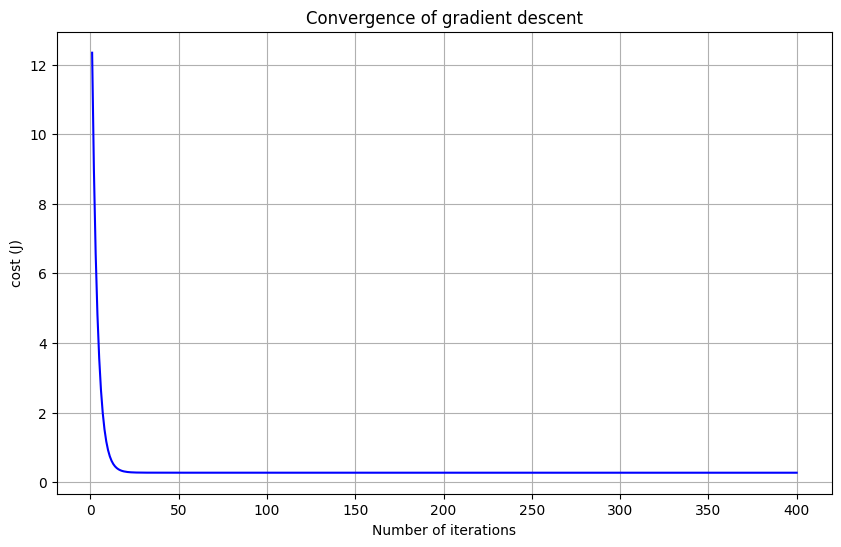

In [204]:
import matplotlib.pyplot as plt
plt.plot(range(1, iterations +1), cost_history, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Convergence of gradient descent")

The Impact of Learning Rate  
To determine the effect of learning rates on convergence, you can store cost records for other learning rates and plot convergence plots for better visualization.  
Note the change in the convergence curve as the learning rate changes.  
If the learning rate is small, the slope descent method takes a very long time to converge to the optimal value.  
Increasing the alpha value makes the slope sharp and reduces the time it takes for the gradient descent to converge.  
However, if the value of the learning rate (alpha = 1.32, brown line) is too large, the gradient descent method may radiate without decreasing in all iterations  

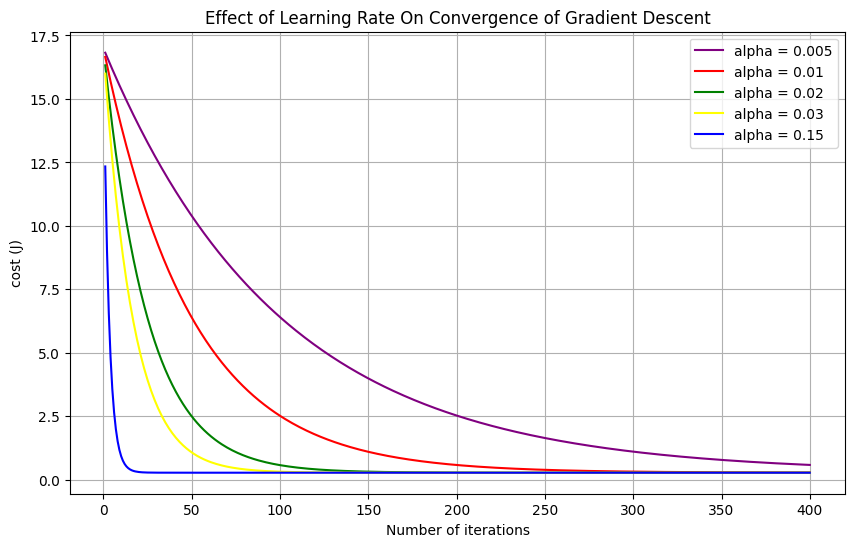

In [205]:
iterations = 400
theta = np.zeros(12)

alpha = 0.005
theta_1, cost_history_1 = gradient_descent(x_train, y_train, theta, alpha, iterations)

alpha = 0.01
theta_2, cost_history_2 = gradient_descent(x_train, y_train, theta, alpha, iterations)

alpha = 0.02
theta_3, cost_history_3 = gradient_descent(x_train, y_train, theta, alpha, iterations)

alpha = 0.03
theta_4, cost_history_4 = gradient_descent(x_train, y_train, theta, alpha, iterations)

alpha = 0.15
theta_5, cost_history_5 = gradient_descent(x_train, y_train, theta, alpha, iterations)

plt.plot(range(1, iterations +1), cost_history_1, color ='purple', label = 'alpha = 0.005')
plt.plot(range(1, iterations +1), cost_history_2, color ='red', label = 'alpha = 0.01')
plt.plot(range(1, iterations +1), cost_history_3, color ='green', label = 'alpha = 0.02')
plt.plot(range(1, iterations +1), cost_history_4, color ='yellow', label = 'alpha = 0.03')
plt.plot(range(1, iterations +1), cost_history_5, color ='blue', label = 'alpha = 0.15')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Effect of Learning Rate On Convergence of Gradient Descent")
plt.legend()

Text(0.5, 1.0, 'Effect of Large Learning Rate On Convergence of Gradient Descent')

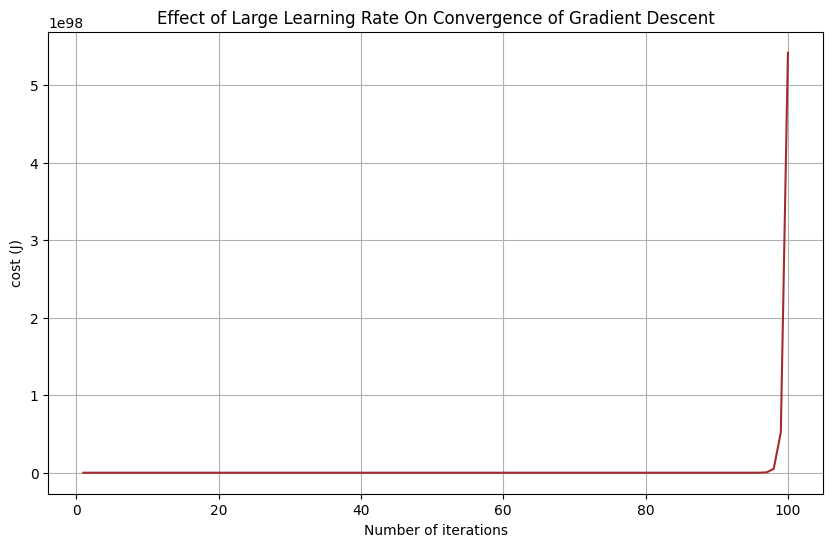

In [206]:
iterations = 100
theta = np.zeros(12)

alpha = 1.32
theta_6, cost_history_6 = gradient_descent(x_train, y_train, theta, alpha, iterations)

plt.plot(range(1, iterations +1), cost_history_6, color ='brown')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Effect of Large Learning Rate On Convergence of Gradient Descent")

In [213]:
#normalize_test_data = ((np.array([1650, 12]) - mu) / sigma)
#print(X[0:1,:].size)

# y_pre = np.zeros(len(test_set))
# SSE = 0
# for i in range(len(test_set)):
#     t = test_set[i]
#     y_pre[i] = X[t].dot(train_weights)
#     SE = np.square(y_pre[i]-y[t])
#     SSE = SSE + SE

# RMSE = pow(1/len(test_set) * SSE[0,0], 0.5)
# RMSE

cnt=0
for i in range(len(x_test)):
    normalize_test_data = ((x_test[i]) - mu1) / sigma1
    normalize_test_data = np.hstack((np.ones(1), normalize_test_data))
    quality0 = normalize_test_data.dot(theta)
    quality1 = normalize_test_data.dot(theta_1)
    quality2 = normalize_test_data.dot(theta_2)
    quality3 = normalize_test_data.dot(theta_3)
    quality4 = normalize_test_data.dot(theta_4)
    quality5 = normalize_test_data.dot(theta_5)
    if(round(quality2)==y[i]):
        cnt+=1
    
    accuracy = cnt/len(x_test)
    # print(accuracy)
    # print('Predicted quality in alpha2', quality2)
    # print('actual quality',y[i])
print('accuracy is: ',accuracy)
print('Predicted quality in alpha0', quality0)
print('Predicted quality in alpha1', quality1)
print('Predicted quality in alpha2', quality2)
print('Predicted quality in alpha3', quality3)
print('Predicted quality in alpha4', quality4)
print('Predicted quality in alpha5', quality5)

print('actual quality',y[i])


accuracy is:  0.5274846086191732
Predicted quality in alpha0 0.0
Predicted quality in alpha1 4.866527359194116
Predicted quality in alpha2 5.488083522564229
Predicted quality in alpha3 5.556443935047911
Predicted quality in alpha4 5.549300436494268
Predicted quality in alpha5 5.52655649190719
actual quality 6
